<a href="https://colab.research.google.com/github/Smriti79/Celebal-Technologies/blob/main/AssignmentFive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-10-3225132773.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['SalePrice'] = train['SalePrice']


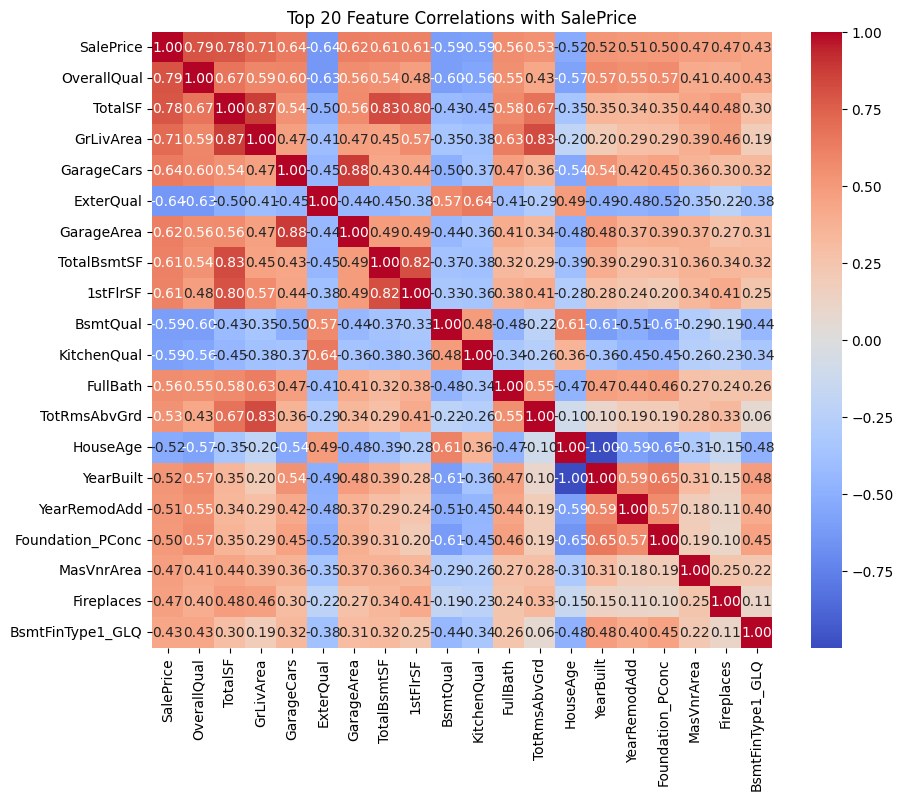

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = pd.concat([train.drop('SalePrice', axis=1), test], sort=False)

# Fill missing values
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
for col in ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'GarageType', 'GarageFinish',
            'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    all_data[col] = all_data[col].fillna('None')
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea']:
    all_data[col] = all_data[col].fillna(0)
for col in all_data.select_dtypes(include='object').columns:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# Feature engineering
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']

# Ordinal encoding
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in ordinal_cols:
    le = LabelEncoder()
    all_data[col] = le.fit_transform(all_data[col].astype(str))

# One-hot encode remaining categorical variables
all_data = pd.get_dummies(all_data)

# Scale numeric features
scaler = StandardScaler()
for col in ['GrLivArea', 'TotalSF', 'HouseAge']:
    all_data[col] = scaler.fit_transform(all_data[[col]])

# Split train/test back
train_processed = all_data[:train.shape[0]]
test_processed = all_data[train.shape[0]:]

# Add SalePrice back for EDA
train_processed['SalePrice'] = train['SalePrice']

# Compute correlations
corr = train_processed.corr()

# Sort and select top 20 features most correlated with SalePrice
top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).head(20).index

# Plot heatmap for just those
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(train_processed[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 20 Feature Correlations with SalePrice")
plt.show()